In [8]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak

In [5]:
!ls /data/tmathew/ntups/mc23d/

dijet_y.root		ggHyyd_y.root	VHyyd_y.root   Zgamma_y.root
gammajet_direct_y.root	qqZHyyd_y.root	Wgamma_y.root  Zjets_y.root
gammajet_frag_y.root	VBFHyyd_y.root	Wjets_y.root


In [9]:
path = "/data/tmathew/ntups/mc23d/ggHyyd_y.root"
f = uproot.open(path)['nominal']
f.keys()

['run',
 'randomRunNumber',
 'event',
 'year',
 'averageIntPerXing',
 'actualIntPerXing',
 'corAverageIntPerXing',
 'corActualIntPerXing',
 'trigger_HLT_g100_loose_L1EM22VHI',
 'trigger_HLT_g100_loose_L1eEM26M',
 'trigger_HLT_g100_loose_L1eEM28M',
 'trigger_HLT_g120_loose_L1EM22VHI',
 'trigger_HLT_g120_loose_L1eEM26M',
 'trigger_HLT_g120_loose_L1eEM28MHLT_g25_loose_L1EM20VH',
 'trigger_HLT_g140_loose_L1EM22VHI',
 'trigger_HLT_g140_loose_L1eEM26M',
 'trigger_HLT_g25_loose_L1eEM24L',
 'trigger_HLT_g30_loose_L1EM20VH',
 'trigger_HLT_g30_loose_L1eEM24L',
 'trigger_HLT_g40_loose_L1EM20VH',
 'trigger_HLT_g40_loose_L1eEM24L',
 'trigger_HLT_g50_loose_L1EM20VH',
 'trigger_HLT_g50_loose_L1eEM24L',
 'trigger_HLT_g50_tight_xe40_cell_xe50_pfopufit_80mTAC_EM22VHI',
 'trigger_HLT_g50_tight_xe40_cell_xe50_pfopufit_80mTAC_L1eEM26M',
 'trigger_HLT_g50_tight_xe40_cell_xe60_pfopufit_80mTAC_EM22VHI',
 'trigger_HLT_g50_tight_xe40_cell_xe60_pfopufit_80mTAC_L1eEM26M',
 'trigger_HLT_g50_tight_xe40_cell_xe70_pf

In [ ]:
from flask import Flask, render_template, send_from_directory
import os

app = Flask(__name__)

@app.route('/')
def index():
    image_folder = './Plots'  # Path to your image folder
    images = [f for f in os.listdir(image_folder) if f.endswith('.png')]
    return render_template('mc23d.html', images=images)

@app.route('/Plots/<path:filename>')
def static_images(filename):
    return send_from_directory('./Plots', filename)

if __name__ == '__main__':
    app.run(debug=True)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 102 kB 21.5 MB/s            
     |████████████████████████████████| 98 kB 11.7 MB/s            
     |████████████████████████████████| 134 kB 55.5 MB/s            
     |████████████████████████████████| 224 kB 54.4 MB/s            


[0, 0, 15.8, 49.3, 0, 12.9, 0, 0, ..., 63.6, 134, 2.62, 98.2, 21.2, 2.32, 3.13]


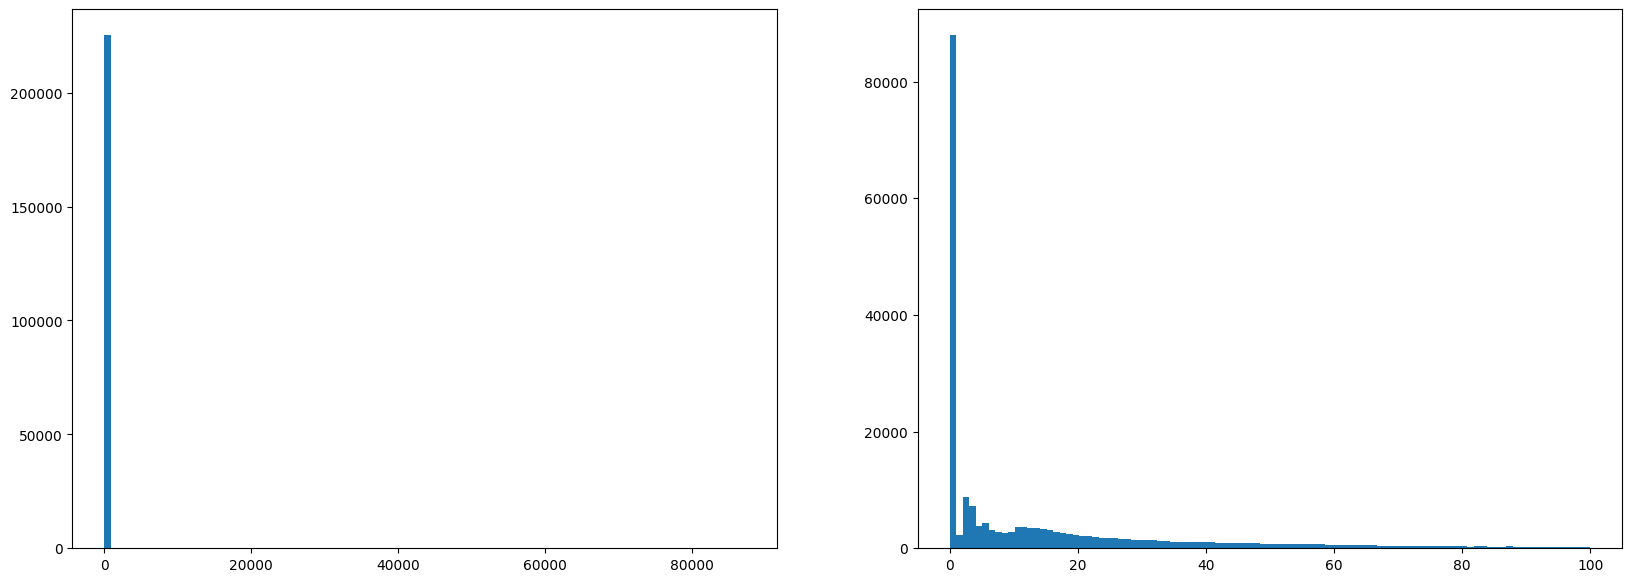

In [14]:
path = "/data/tmathew/ntups/mc23d/ggHyyd_y.root"
f = uproot.open(path)['nominal']
f.keys()

vtx_sumPt = f['vtx_sumPt'].array(library='ak')
print(ak.flatten(vtx_sumPt))

plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.hist(ak.flatten(vtx_sumPt), bins=100)

plt.subplot(122)
plt.hist(ak.flatten(vtx_sumPt), bins=np.linspace(0, 100, 100))

plt.show()